Imports


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split,  GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

Data Preprocessing

In [ ]:
df = pd.read_csv('breast-cancer.csv')

# Dropping diagnosis and id
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis']

# Convert labels to numeric : B -> 0, M -> 1
le = LabelEncoder()
y = le.fit_transform(y) 

# Standardizing features and splitting data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Training SVM with linear and RBF kernel

In [9]:
# Linear SVM
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)
print("Linear SVM Results:")
print(classification_report(y_test, svm_linear.predict(X_test)))

# RBF kernel
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)
print("RBF Kernel SVM Results:")
print(classification_report(y_test, svm_rbf.predict(X_test)))


Linear SVM Results:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

RBF Kernel SVM Results:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Visualizing Decision boundary

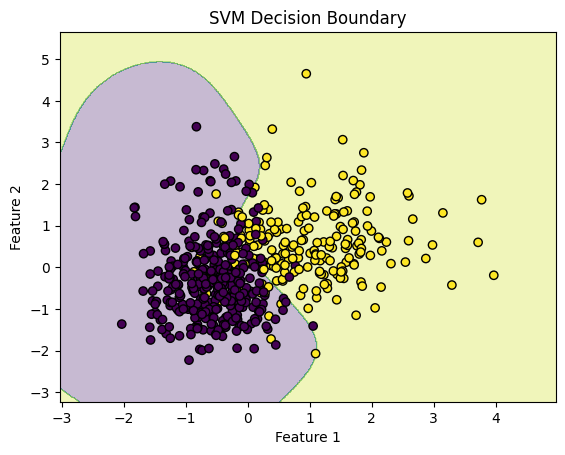

In [ ]:
# Selecting only 2 features for visualization
X_2D = X_scaled[:, :2] 

model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_2D, y)

# Plotting decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("SVM Decision Boundary")
    plt.show()

plot_decision_boundary(X_2D, y, model)


Tuning Hyperparameters: C and gamma

In [11]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)


Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best score: 0.9736263736263737


Cross Validation

In [ ]:
scores = cross_val_score(SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma']),
                         X_scaled, y, cv=5)
print("Cross-validation accuracy:", scores.mean())


Cross-validation accuracy: 0.9736376339077782
